In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Reduce_the_data_seasonal_counts').getOrCreate()

df = spark.read.csv('../Bike-Sharing-Dataset-hour_new.csv',header=True,inferSchema=True)

In [6]:
import pandas as pd
from pyspark.sql.functions import *

group_df = df.select('season','casual','registered','cnt')
group_df = group_df.groupBy('season').mean()
group_df = group_df.select('season',
                            format_number('avg(casual)',2),
                            format_number('avg(registered)',2),
                            format_number('avg(cnt)',2))
group_df = group_df.select(col('season').alias('Season'),
                           col('format_number(avg(casual), 2)').alias('Average Casual'),
                           col('format_number(avg(registered), 2)').alias('Average Registered'),
                           col('format_number(avg(cnt), 2)').alias('Average CNT')).orderBy('Average CNT')
count_df = group_df.withColumn('Season', when(group_df.Season == 1, 'Winter')
                               .otherwise(when(group_df.Season == 2, 'Spring')
                               .otherwise(when(group_df.Season == 3, 'Summer')
                               .otherwise(when(group_df.Season == 4, 'Autumn').otherwise('Unknown')))))
pd.DataFrame(count_df.take(count_df.count()), columns=count_df.columns)

,Season,Average Casual,Average Registered,Average CNT
0,Winter,14.77,98.13,112.90
1,Autumn,30.71,168.04,198.75
2,Spring,46.15,162.18,208.33
3,Summer,50.23,185.61,235.85


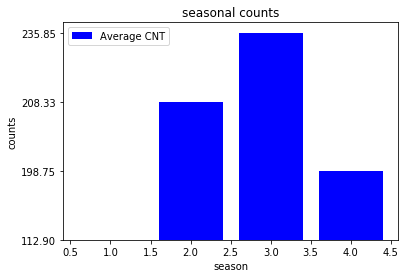

In [7]:
import matplotlib.pyplot as plt

group_df = group_df.toPandas()
plt.bar(group_df['Season'], group_df['Average CNT'], color = 'b')
plt.legend(['Average CNT'])
plt.xlabel('season')
plt.ylabel('counts')
plt.title('seasonal counts')
plt.show()